In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("C:/Users/USER/Downloads/bright_automotive_company.csv")

## Data Understanding


# About Data

Bright Motor Company want to analyze the data to get a fair idea about the demand of customers which will help them in enhancing their customer experience. Suppose you are a Data Scientist at the company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

## Data Description

•	Age: The age of the individual in years.

•	Gender: The gender of the individual, categorized as male or female.

•	Profession: The occupation or profession of the individual.

•	Marital_status: The marital status of the individual, such as married &, 

•	Education: The educational qualification of the individual Graduate and Post Graduate

•	No_of_Dependents: The number of dependents (e.g., children, elderly parents) that the individual supports financially.

•	Personal_loan: A binary variable indicating whether the individual has taken a personal loan "Yes" or "No"

•	House_loan: A binary variable indicating whether the individual has taken a housing loan "Yes" or "No"

•	Partner_working: A binary variable indicating whether the individual's partner is employed "Yes" or "No"

•	Salary: The individual's salary or income.

•	Partner_salary: The salary or income of the individual's partner, if applicable.

•	Total_salary: The total combined salary of the individual and their partner (if applicable).

•	Price: The price of a product or service.

•	Make: The type of automobile



In [7]:
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300.0,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500.0,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300.0,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,?,Yes,No,Yes,72500.0,70300.0,142800,61000,?
4,53,Male,NaN,Married,Post Graduate,3,No,No,Yes,79700.0,60200.0,139900,57000,SUV


In [8]:
df.tail()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
1576,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300.0,0.0,33300,27000,Hatchback
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000.0,NaN,32000,31000,Hatchback
1578,22,Male,Business,Single,Graduate,2,No,Yes,No,32900.0,0.0,32900,30000,Hatchback
1579,22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200.0,NaN,32200,24000,Hatchback
1580,22,Male,Salaried,Married,Graduate,4,No,No,No,31600.0,0.0,31600,31000,Hatchback


In [9]:
df.shape

(1581, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1575 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   object 
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1568 non-null   float64
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 173.1+ KB


In [11]:
df.describe()

,Age,Salary,Partner_salary,Total_salary,Price
count,1581.000000,1568.000000,1475.000000,1581.000000,1581.000000
mean,31.952562,60276.913265,20225.559322,79625.996205,35948.170778
std,8.712549,14636.200199,19573.149277,25545.857768,21175.212108
min,14.000000,30000.000000,0.000000,30000.000000,58.000000
25%,25.000000,51900.000000,0.000000,60500.000000,25000.000000
50%,29.000000,59450.000000,25600.000000,78000.000000,31000.000000
75%,38.000000,71700.000000,38300.000000,95900.000000,47000.000000
max,120.000000,99300.000000,80500.000000,171000.000000,680000.000000


MISSING VALUES

In [13]:
df.isnull().sum()

Age                   0
Gender               53
Profession            6
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary               13
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [14]:
print("Total duplicate entries: ",len(df[df.duplicated()]))

Total duplicate entries:  0


In [15]:
df['Gender'].value_counts()

Gender
Male      1199
Female     327
Femal        1
Femle        1
Name: count, dtype: int64

In [16]:
# Anomalies in age
len(df[(df['Age']<18) & (df['Age']>90)])

0

In [17]:
#Anomalies in Total_salary
len(df[df['Salary']+df['Partner_salary']!=df['Total_salary']])

119

# Data Cleaning and Transformation

In [19]:
data = df.copy()

In [20]:
data['Gender']= data['Gender'].replace({
    'Femal':'Female','Femle':'Female'})
data['Gender'].value_counts()

Gender
Male      1199
Female     329
Name: count, dtype: int64

In [21]:
data.fillna({'Gender':data['Gender'].mode()[0]},inplace=True)# replacing null values with maximum no. of  gender

In [22]:
data['Gender'].value_counts()

Gender
Male      1252
Female     329
Name: count, dtype: int64

In [23]:
data['Make'].value_counts()

Make
Sedan        702
Hatchback    582
SUV          295
?              2
Name: count, dtype: int64

In [24]:
# Replacing ? with mode of make
data['Make']=data['Make'].replace({'?':'Sedan'})

In [25]:
# Replace ? to 0
data['No_of_Dependents']=data['No_of_Dependents'].replace({'?':0})

In [26]:
# dtype conversion of column no_of_Dependents
data['No_of_Dependents']=data['No_of_Dependents'].astype(int)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1581 non-null   object 
 2   Profession        1575 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int32  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1568 non-null   float64
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(2), int32(1), int64(3), object(8)
memory usage: 166.9+ KB


In [28]:
# Replace null profession with mode of profession
data.fillna({'Profession' : data['Profession'].mode()[0]},inplace=True)

In [29]:
# Replace null salary with mean salary value
data.fillna({'Salary':round(data['Salary'].mean(),2)},inplace=True)

In [30]:
data.fillna({'Partner_salary':round(data['Partner_salary'].mean(),2)},inplace=True)

In [31]:
data.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

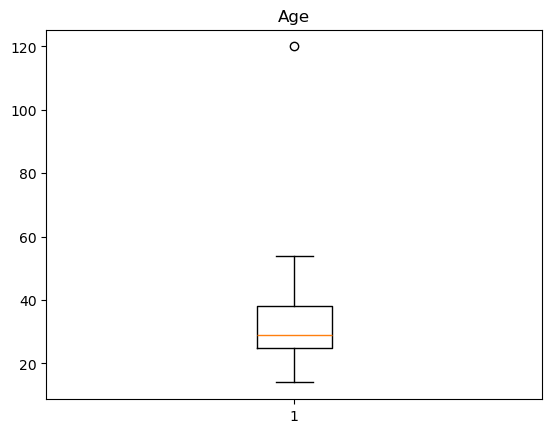

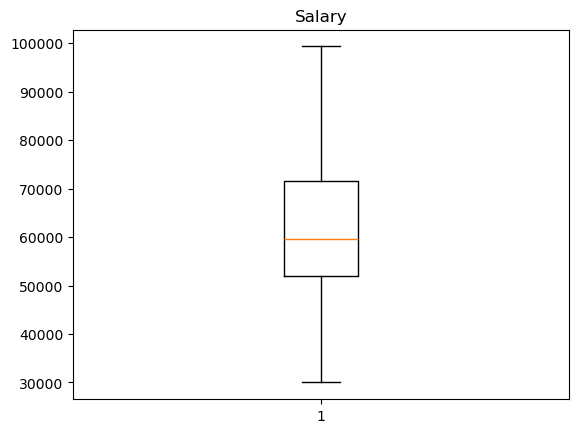

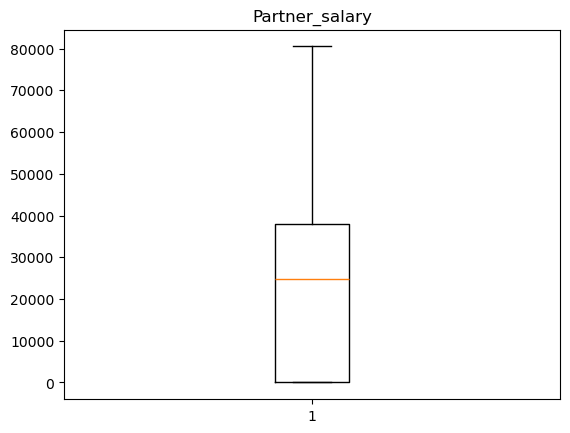

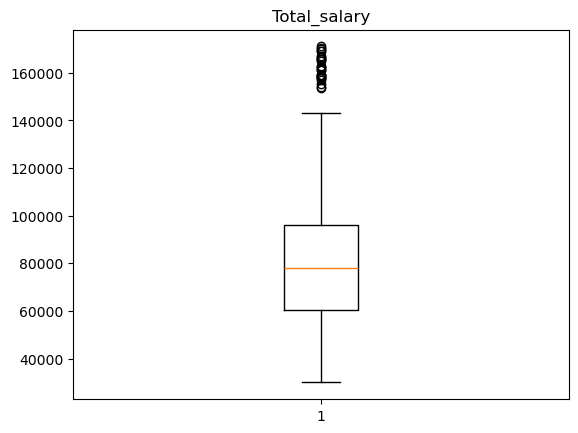

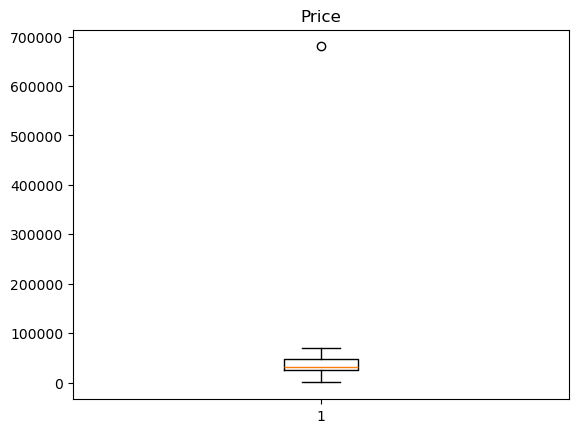

In [32]:
for col in ['Age','Salary','Partner_salary','Total_salary','Price']:
    plt.boxplot(data[col])
    plt.title(f"{col}")
    plt.show()

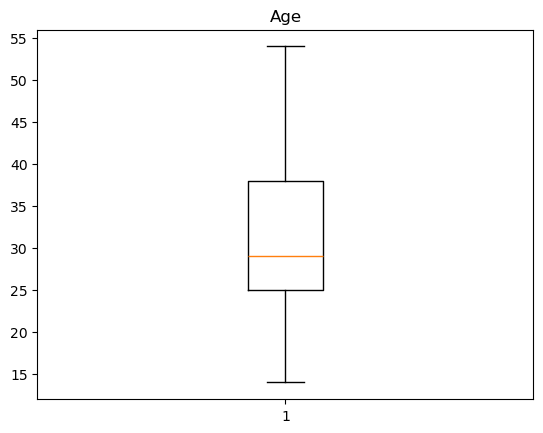

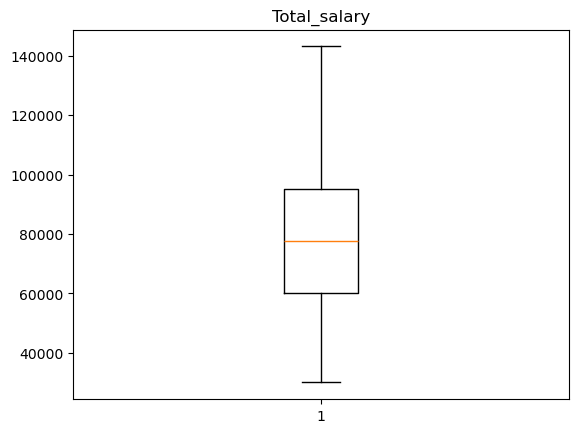

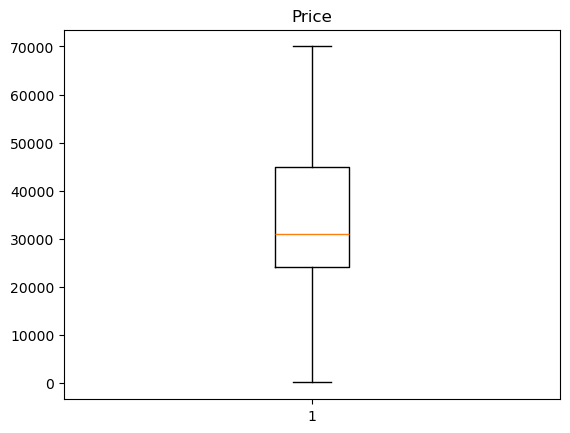

In [33]:
# Remove outliers
for col in ['Age','Total_salary','Price']:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    l_bound = Q1 - 1.5 * IQR
    u_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= l_bound) & (data[col] <= u_bound)]
    plt.boxplot(data[col])
    plt.title(f"{col}")
    plt.show()

In [34]:
# label encoding 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in data.select_dtypes(exclude=['int','float']):
    data[col] = le.fit_transform(data[col])
data.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
3,53,0,1,0,0,0,1,0,1,72500.0,70300.0,142800,61000,2
4,53,1,1,0,1,3,0,0,1,79700.0,60200.0,139900,57000,1
5,53,0,1,0,1,3,0,0,1,79800.0,60500.0,140300,57000,1
6,53,0,1,0,1,3,1,0,1,80900.0,50800.0,131700,51000,1
7,52,1,1,0,0,4,0,0,1,79100.0,40400.0,119500,68000,1


# EDA

## What are the mean, median, and standard deviation of the ages of individuals in the dataset?

In [37]:
print(f"Mean:{data['Age'].mean()}\nMedian:{data['Age'].median()}\nMode:{data['Age'].mode()[0]}")

Mean:31.600772698003862
Median:29.0
Mode:28



## What is the distribution of gender in the dataset? Represent it using a pie chart.

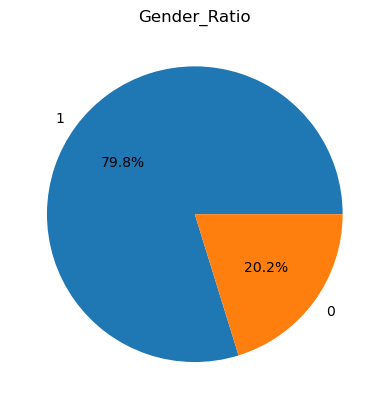

In [39]:
plt.pie(data['Gender'].value_counts(),labels=(data['Gender'].value_counts().index),autopct ='%1.1f%%')
plt.title('Gender_Ratio')
plt.show()

## Is there a correlation between age and salary? Provide the correlation coefficient and interpret the result.

<Axes: >

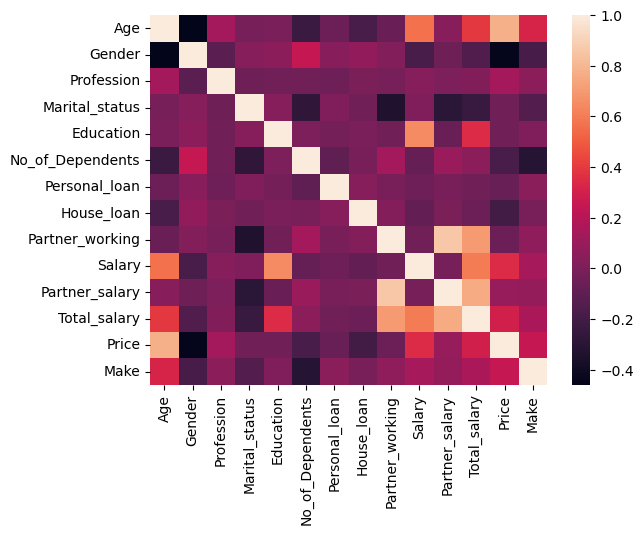

In [41]:
num_data = data.select_dtypes(include=['int','float'])
sns.heatmap(num_data.corr())

## What is the average salary for individuals based on their educational qualifications (Graduate vs. Post Graduate)

In [43]:
avg_salary = data.groupby(by='Education')['Salary'].mean()
avg_salary

Education
0    48103.741763
1    66775.381298
Name: Salary, dtype: float64

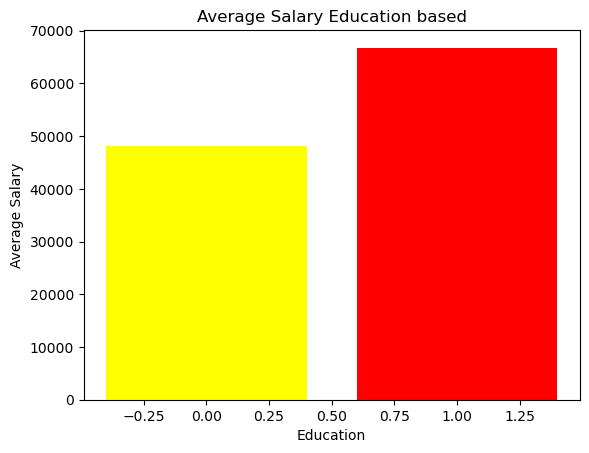

In [44]:
plt.bar(avg_salary.index, avg_salary,color=['yellow','red'])
plt.xlabel('Education')
plt.ylabel('Average Salary')
plt.title("Average Salary Education based")
plt.show()

## What percentage of individuals have taken a personal loan? How does this compare between males and females?

In [46]:
print("0:Female\n 1:Male")
loan_percentage = data['Personal_loan'].mean() * 100
print(f"Overall personal loan percentage: {loan_percentage:.2f}%")
loan_by_gender = data.groupby('Gender')['Personal_loan'].mean() * 100
print(loan_by_gender)

0:Female
 1:Male
Overall personal loan percentage: 50.55%
Gender
0    46.815287
1    51.493140
Name: Personal_loan, dtype: float64


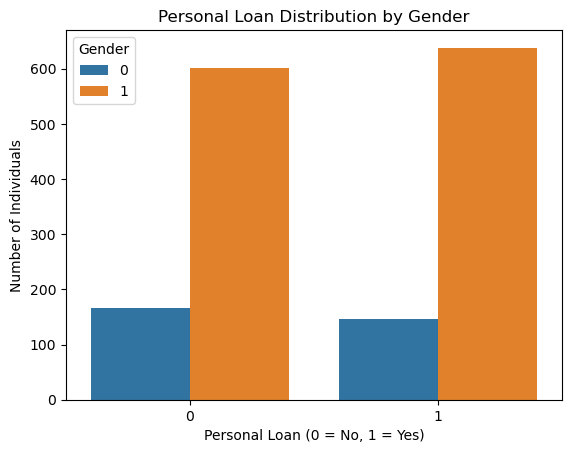

In [47]:
sns.countplot(data=data, x='Personal_loan', hue='Gender')
plt.title('Personal Loan Distribution by Gender')
plt.xlabel('Personal Loan (0 = No, 1 = Yes)')
plt.ylabel('Number of Individuals')
plt.legend(title='Gender')
plt.show()

# What is the average number of dependents for married individuals vs single individuals?

In [49]:
avg_dependent = data.groupby(by='Marital_status')['No_of_Dependents'].mean().reset_index()
avg_dependent

,Marital_status,No_of_Dependents
0,0,2.522968
1,1,1.608696


C:\Users\USER\AppData\Local\Temp\ipykernel_6372\694692414.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_dependent, x='Marital_status', y='No_of_Dependents', palette='Set2')


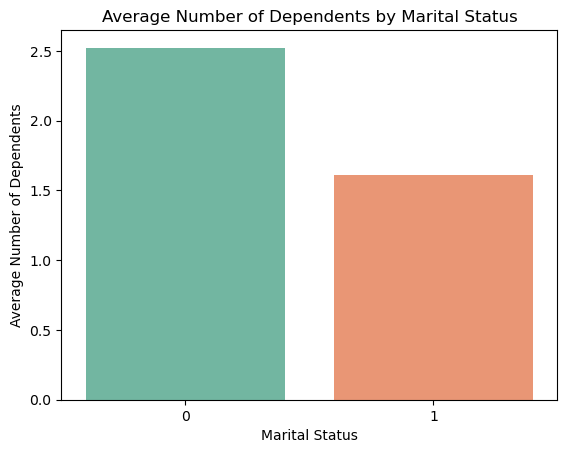

In [50]:
sns.barplot(data=avg_dependent, x='Marital_status', y='No_of_Dependents', palette='Set2')
plt.title('Average Number of Dependents by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Average Number of Dependents')
plt.show()


## How does the employment status of a partner affect the total combined salary?

In [52]:
salary_data = data.groupby('Partner_working')['Total_salary'].mean()
salary_data

Partner_working
0    60527.208976
1    93143.452381
Name: Total_salary, dtype: float64

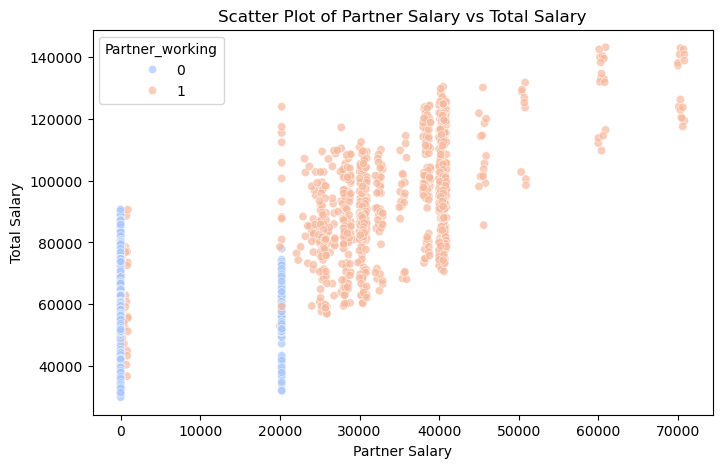

In [53]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Partner_salary', y='Total_salary', data=data, hue='Partner_working', palette='coolwarm', alpha=0.7)
plt.xlabel('Partner Salary')
plt.ylabel('Total Salary')
plt.title('Scatter Plot of Partner Salary vs Total Salary')
plt.show()

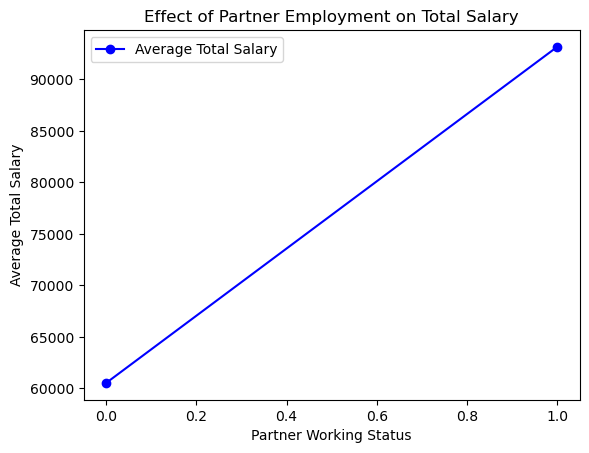

In [54]:
plt.plot(salary_data.index, salary_data.values, marker='o', linestyle='-', color='blue', label='Average Total Salary')
plt.xlabel('Partner Working Status')
plt.ylabel('Average Total Salary')
plt.title('Effect of Partner Employment on Total Salary')
plt.legend()
plt.show()

# Compare the average salary of individuals whose partners are working versus those whose partners are not working.

In [56]:
avg_salary_data = data.groupby('Partner_working')['Salary'].mean()
avg_salary_data

Partner_working
0    60271.528513
1    59181.309524
Name: Salary, dtype: float64

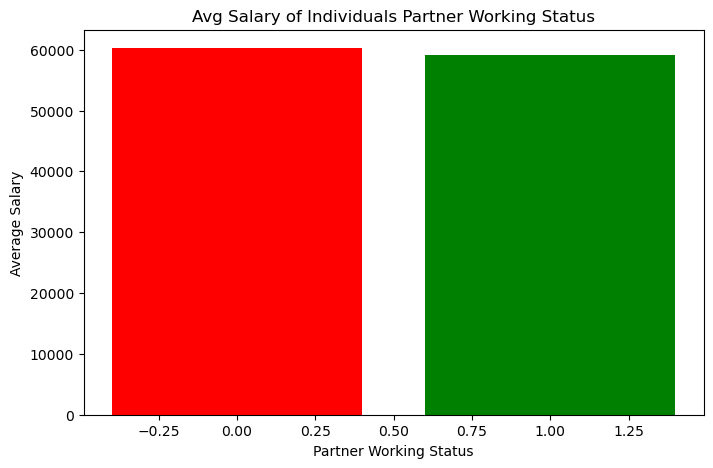

In [57]:
plt.figure(figsize=(8, 5))
plt.bar(avg_salary_data.index,avg_salary_data,color=['red','green'])
plt.xlabel('Partner Working Status')
plt.ylabel('Average Salary')
plt.title('Avg Salary of Individuals Partner Working Status')
plt.show()

## What is the proportion of individuals with house loans based on their profession?

In [103]:
home_loan = data[data['House_loan']==1].groupby(by='Profession')['House_loan'].count()# 1 show yes
print(home_loan)

Profession
0    229
1    298
Name: House_loan, dtype: int64


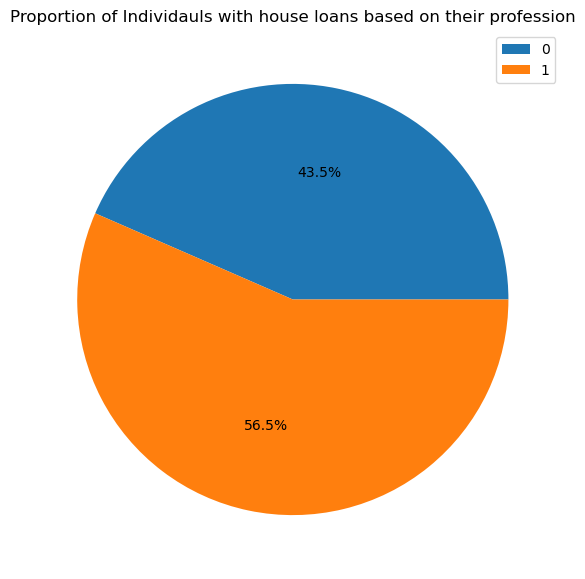

In [105]:
plt.figure(figsize=(7,7))
plt.pie(house_loan,autopct='%1.1f%%')
plt.legend(labels=house_loan.index)
plt.title("Proportion of Individauls with house loans based on their profession")
plt.show()

## What is the distribution of salaries for individuals with personal loans versus those without personal loans? Represent it using a box plot.

In [110]:
plsalaries = [group['Salary'].values for _, group in data.groupby('Personal_loan')]

C:\Users\USER\AppData\Local\Temp\ipykernel_6372\3889344101.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(plsalaries, labels=['No Personal Loan', 'Has Personal Loan'])


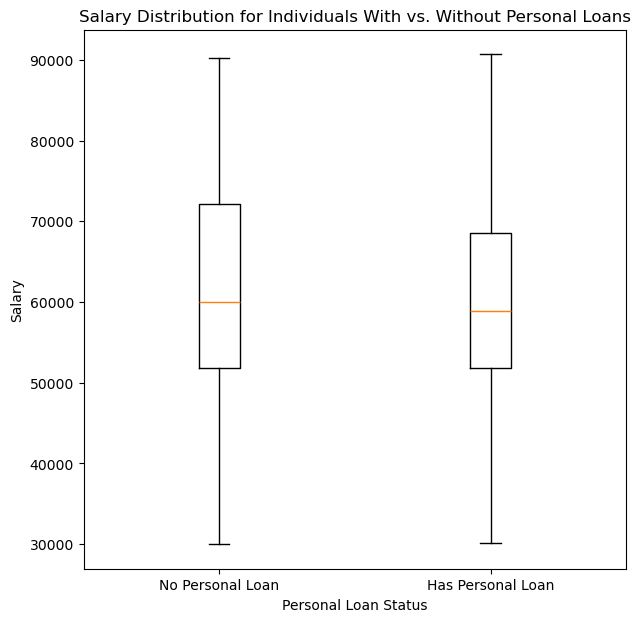

In [112]:
plt.figure(figsize=(7, 7))
plt.boxplot(plsalaries, labels=['No Personal Loan', 'Has Personal Loan'])
plt.title('Salary Distribution for Individuals With vs. Without Personal Loans')
plt.xlabel('Personal Loan Status')
plt.ylabel('Salary')
plt.show()

## How does the type of automobile relate to the salary of the individuals? Provide insights based on the make of the automobile.

In [115]:
automobile_data = [group['Salary'].values for _,group in data.groupby(by='Make')]

C:\Users\USER\AppData\Local\Temp\ipykernel_6372\1173980866.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(automobile_data,labels=['Hatchback','SUV','Sedan'])


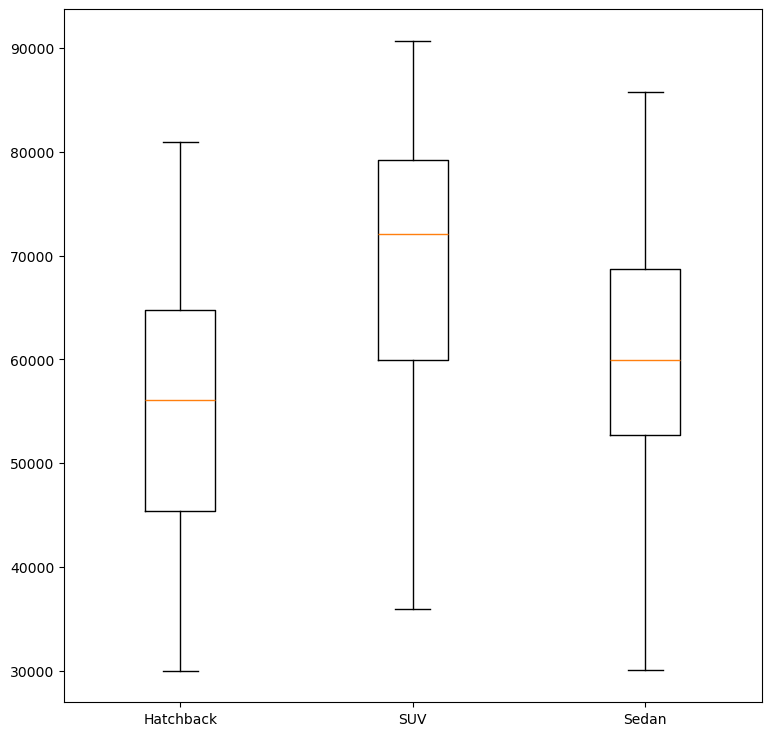

In [117]:
plt.figure(figsize=(9,9))
plt.boxplot(automobile_data,labels=['Hatchback','SUV','Sedan'])
plt.show()

## What is the average price of the product/service in the dataset? How does this price vary based on the individual's total salary?

<Figure size 900x600 with 0 Axes>

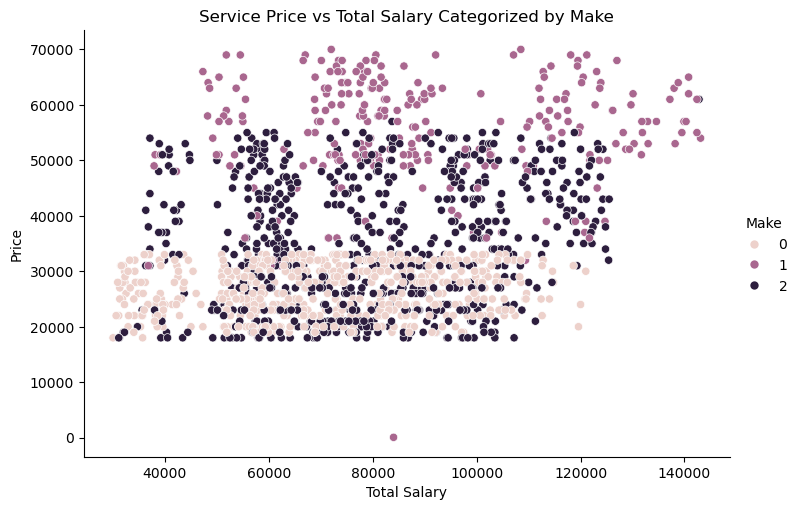

In [120]:
avg_price = round(data.groupby('Make')['Price'].mean(),2)
plt.figure(figsize=(9, 6))
sns.relplot(x="Total_salary", y="Price", hue="Make", data=data, kind="scatter", height=5, aspect=1.5)
plt.xlabel("Total Salary")
plt.ylabel("Price")
plt.title("Service Price vs Total Salary Categorized by Make")
plt.show()

## Is there a significant difference in the number of personal loans taken by married individuals compared to single individuals?


In [125]:
personal_loan = data[data['Personal_loan']==1].groupby('Marital_status')['Personal_loan'].count()
personal_loan

Marital_status
0    713
1     72
Name: Personal_loan, dtype: int64

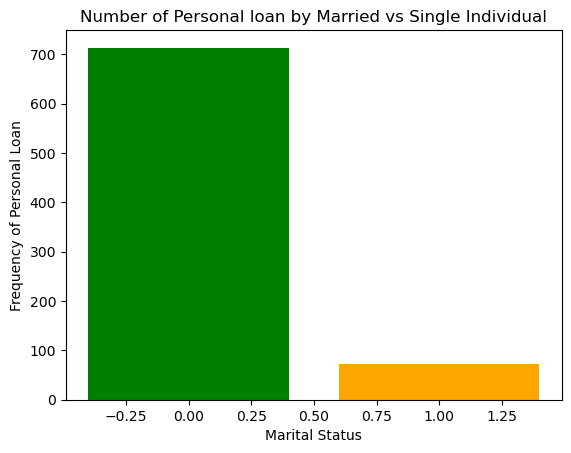

In [127]:
plt.bar(personal_loan.index, personal_loan,color=['green','orange'])
plt.xlabel('Marital Status')
plt.ylabel('Frequency of Personal Loan')
plt.title("Number of Personal loan by Married vs Single Individual")
plt.show()

## How does educational qualification impact the likelihood of taking a house loan?

In [133]:
education_loan_counts = data[data['House_loan']==1].groupby('Education')['House_loan'].count()
print(education_loan_counts)
print(f"Percentage of House loan taken by UG Individuals compared to PG Individuals is:{round((education_loan_counts.iloc[1]-education_loan_counts.iloc[0])/education_loan_counts.iloc[0]*100,2)}%")

Education
0    202
1    325
Name: House_loan, dtype: int64
Percentage of House loan taken by UG Individuals compared to PG Individuals is:60.89%


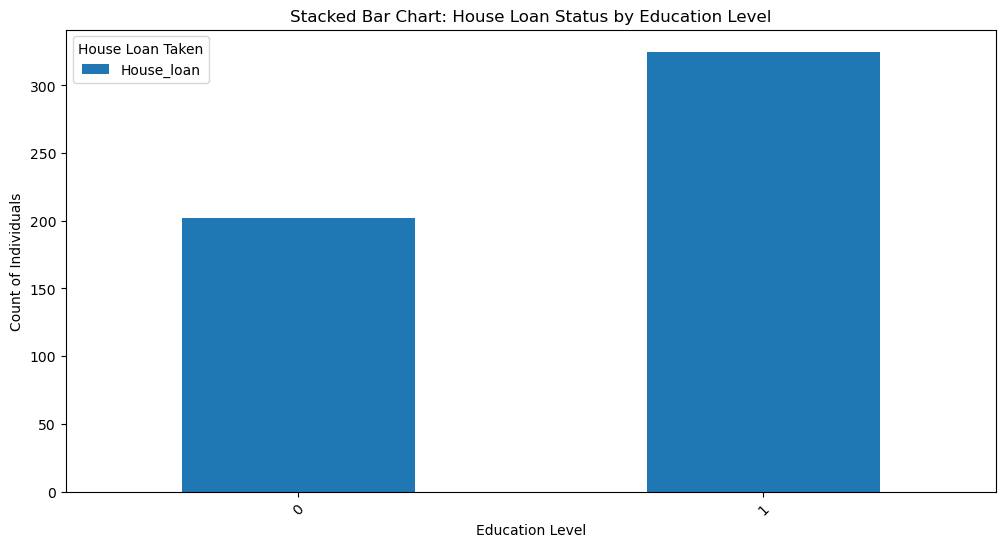

In [135]:
education_loan_counts.plot(kind="bar", stacked=True, figsize=(12, 6))
plt.xlabel("Education Level")
plt.ylabel("Count of Individuals")
plt.title("Stacked Bar Chart: House Loan Status by Education Level")
plt.legend(title="House Loan Taken")
plt.xticks(rotation=45)
plt.show()

## Analyze the number of dependents based on the profession of the individual. Which profession has the highest average number of dependents?

In [138]:

profession_dependentscount = data.groupby('Profession')['No_of_Dependents'].mean()
profession_dependentscount

Profession
0    2.481536
1    2.410959
Name: No_of_Dependents, dtype: float64

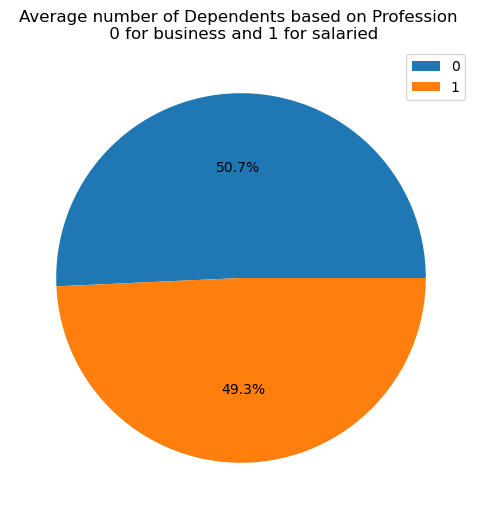

In [146]:
plt.figure(figsize=(10,6))
plt.pie(profession_dependentscount,autopct='%1.1f%%')
plt.title('Average number of Dependents based on Profession \n 0 for business and 1 for salaried')
plt.legend(labels=profession_dependentscount.index)
plt.show()

## Is there a significant difference in salaries between males and females? Provide statistical evidence.

In [149]:
gender_based_salary = data.groupby('Gender')['Salary'].describe()
gender_based_salary

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
0,314.0,64651.322548,13380.494098,34800.0,56050.0,63050.0,76075.0,90700.0
1,1239.0,58422.424980,13873.466699,30000.0,51050.0,58300.0,68500.0,89900.0


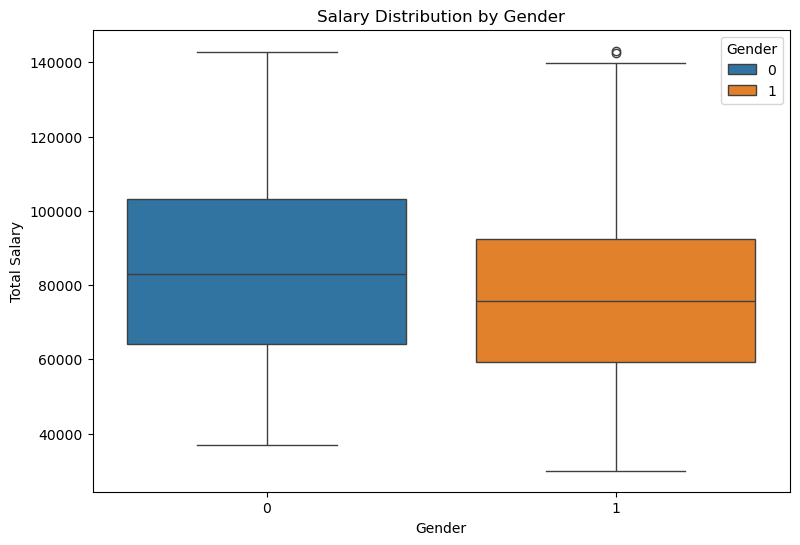

In [155]:
plt.figure(figsize=(9, 6))
sns.boxplot(x="Gender", y="Total_salary", data=data,hue = 'Gender')
plt.xlabel("Gender")
plt.ylabel("Total Salary")
plt.title("Salary Distribution by Gender")
plt.show()

## How does having a personal loan affect the total combined salary of the individual and their partner?

In [170]:
salary_by_loan = data.groupby("Personal_loan")["Total_salary"].mean()
print(salary_by_loan)
print("0 -> No\n1-> Yes")

Personal_loan
0    78927.604167
1    77426.751592
Name: Total_salary, dtype: float64
0 -> No
1-> Yes


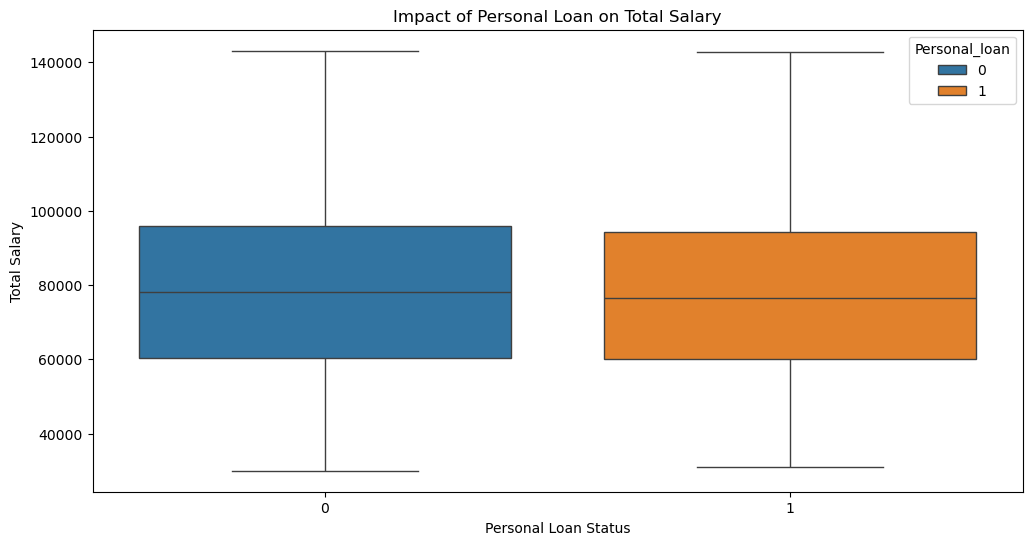

In [172]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Personal_loan", y="Total_salary", data=data, hue='Personal_loan')
plt.xlabel("Personal Loan Status")
plt.ylabel("Total Salary")
plt.title("Impact of Personal Loan on Total Salary")
plt.show()

## What is the average partner's salary for individuals with and without house loans?

In [175]:
houseLoan_partner_salary = data.groupby('House_loan')['Partner_salary'].mean()
round(houseLoan_partner_salary,2)

House_loan
0    19484.37
1    19384.62
Name: Partner_salary, dtype: float64

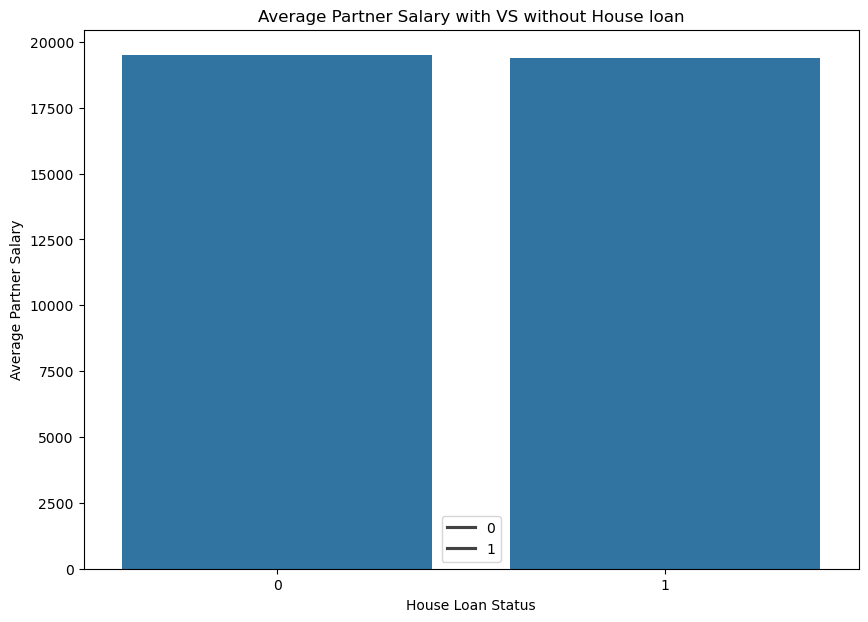

In [179]:
plt.figure(figsize=(10,7))
sns.barplot(houseLoan_partner_salary,)
plt.legend(labels=houseLoan_partner_salary.index)
plt.xlabel('House Loan Status')
plt.ylabel('Average Partner Salary')
plt.title('Average Partner Salary with VS without House loan')
plt.show()

# Conclusion

# Customer Demographics:
Most customers are married individuals aged between 30 and 50, with a graduate or postgraduate education.

The primary professions are salaried employees and business owners.

Many customers have 2–4 dependents, indicating family-oriented buyers.
# Financial Status:
Customers with dual incomes (partner working) have significantly higher total household income.

This group is more likely to afford higher-priced vehicles, especially SUVs.
# Vehicle Choice (Make)
SUVs are the most popular choice, especially among high-income, dual-earner households.

Vehicle price tends to correlate with total salary, making income a strong predictor of customer preference.